In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#missingno
import missingno as msn
# re
import re
import string
# nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
# sklearn
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import feature_extraction, linear_model, model_selection, preprocessing

# joblib
from joblib import dump # used for saving the pipeline

In [2]:
train = pd.read_csv('/home/james/Desktop/IVISHA DS/data/train.csv')

In [3]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
train.shape

(7613, 5)

In [5]:
train.columns

Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [7]:
train.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [8]:
train['location'].value_counts()

USA                 104
New York             71
United States        50
London               45
Canada               29
                   ... 
Fort Calhoun, NE      1
Vineyard              1
N?? Y???.             1
NAIROBI  KENYA        1
Palestine             1
Name: location, Length: 3341, dtype: int64

In [9]:
train['keyword'].value_counts()

fatalities               45
armageddon               42
deluge                   42
damage                   41
sinking                  41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64

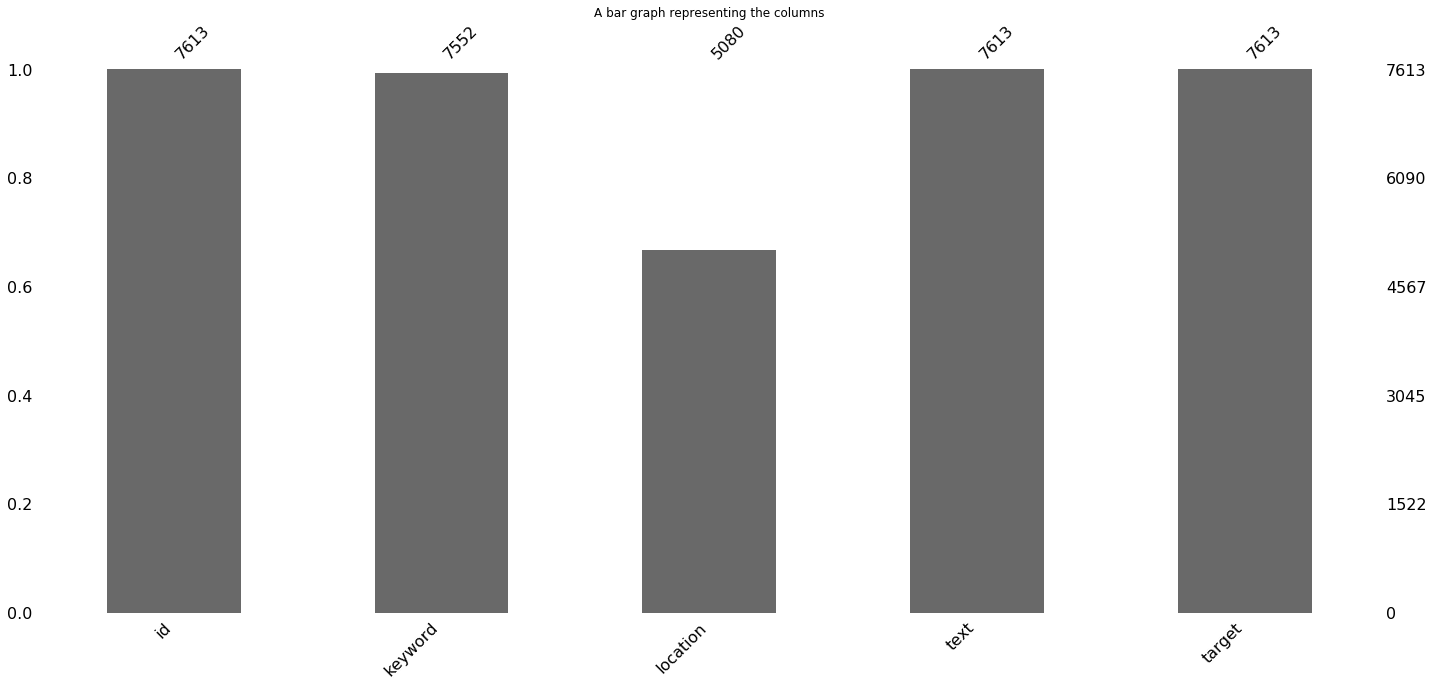

In [10]:
msn.bar(train)
plt.title('A bar graph representing the columns')
plt.show()

In [11]:
train.sample(50)

,id,keyword,location,text,target
985,1429,body%20bagging,have car; will travel,@matt_bez oh I'm not bagging her at all! Her b...,0
4707,6693,landslide,NaN,This Govt of Hubris has small maj yet acts as ...,0
5112,7291,nuclear%20disaster,NaN,#Nuclear policy of #Japan without responsibili...,1
6113,8727,sinking,NaN,That horrible sinking feeling when youÛªve be...,0
3249,4670,engulfed,Coventry,Do you feel engulfed with low self-image? Take...,0
5102,7278,nuclear%20disaster,San Francisco Bay Area,3 Former Executives to Be Prosecuted in Fukush...,1
3475,4970,explosion,NaN,Large explosion rocks aluminum plant in southe...,1
3209,4604,emergency%20services,"Olympia, WA",#Nursing alert: Emergency Department Psychiatr...,1
3357,4807,evacuated,West,Rocky fire in Northern California swells to 60...,1
4806,6841,loud%20bang,Fairgrounds Resident,Moved on to 'Bang Bang Rock and Roll' by @Art_...,0


In [12]:
train.drop('location', axis=1, inplace=True)

In [13]:
train.dropna(subset=['keyword'], axis=0, inplace=True)

In [14]:
train['target'].replace({1:'Real', 0:'Fake'}, inplace=True)

In [15]:
train.head()

,id,keyword,text,target
31,48,ablaze,@bbcmtd Wholesale Markets ablaze http://t.co/l...,Real
32,49,ablaze,We always try to bring the heavy. #metal #RT h...,Fake
33,50,ablaze,#AFRICANBAZE: Breaking news:Nigeria flag set a...,Real
34,52,ablaze,Crying out for more! Set me ablaze,Fake
35,53,ablaze,On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,Fake


In [16]:
train.shape

(7552, 4)

## Basic NLP Techniques

In [17]:
# cleaning the data
def clean_data(text):
    # converting the text to lowercase
    text = text.lower()
    # removing punctuations
    text = re.sub('[%s]' % re.escape(string.punctuation),'', text)
    #removing words with numbers
    text = re.sub('\w*\d\w*',"",text)
    # removing links
    text = re.sub(r'(https?:\/\/)(\s)*(www\.)?(\s)*((\w|\s)+\.)*([\w\-\s]+\/)*([\w\-]+)((\?)?[\w\s]*=\s*[\w\%&]*)*',' ', text,flags=re.MULTILINE)
    
    return text

In [18]:
# applying the clean_data function
train['text'] = train['text'].apply(lambda x: clean_data(x)) # text column

train['keyword'] = train['keyword'].apply(lambda x: clean_data(x)) # keyword column

In [19]:
train.sample(10)

,id,keyword,text,target
744,1075,bleeding,tourofutah saw that pileup on tv keep racing...,Real
461,665,attack,new post from darkreading new smb relay attac...,Real
5884,8404,sandstorm,watch this airport get swallowed up by a sands...,Real
5752,8212,riot,acaciapenn ill start a big ass riot send me t...,Fake
5608,8002,razed,the latest more homes razed by northern califo...,Real
4856,6915,,something about kissing the ass of mass murde...,Fake
6829,9780,trapped,literally trapped in my room cuz my bathroom b...,Real
4238,6022,hazardous,joshlado not tweeting and driving joshua typos...,Fake
7110,10187,,rt nasasolarsystem jupiters red spot is a viol...,Fake
3582,5117,fatal,apd investigating fatal shooting of year old ...,Real


### Word tokenization

In [20]:

def word_tokens(text):
    tokens = word_tokenize(text)
    return tokens
# applying the function
train['text'] = train['text'].apply(lambda x: word_tokens(x))

In [21]:
train['keyword'] = train['keyword'].apply(lambda x: word_tokens(x))

In [22]:
train.text

31                   [bbcmtd, wholesale, markets, ablaze]
32      [we, always, try, to, bring, the, heavy, metal...
33      [africanbaze, breaking, newsnigeria, flag, set...
34              [crying, out, for, more, set, me, ablaze]
35      [on, plus, side, look, at, the, sky, last, nig...
                              ...                        
7578          [cameronhacker, and, i, wrecked, you, both]
7579    [three, days, off, from, work, and, theyve, pr...
7580    [fx, forex, trading, cramer, igers, words, tha...
7581    [engineshed, great, atmosphere, at, the, briti...
7582    [cramer, igers, words, that, wrecked, disneys,...
Name: text, Length: 7552, dtype: object

### Removing stopwords and word stemming

In [23]:
ps = PorterStemmer()
train['text'] = train['text'].apply(lambda x: ' '.join([ps.stem(word) for word in x if word not in stopwords.words('english')]))

In [39]:
corpus = []
corpus.append(train['text'])

In [40]:
corpus

[31                           bbcmtd wholesal market ablaz
 32                         alway tri bring heavi metal rt
 33        africanbaz break newsnigeria flag set ablaz aba
 34                                          cri set ablaz
 35                     plu side look sky last night ablaz
                               ...                        
 7578                                    cameronhack wreck
 7579    three day work theyv pretti much wreck hahaha ...
 7580    fx forex trade cramer iger word wreck disney s...
 7581    enginesh great atmospher british lion gig toni...
 7582             cramer iger word wreck disney stock cnbc
 Name: text, Length: 7552, dtype: object]

### Basic EDA

target
Fake    4323
Real    3229
Name: text, dtype: int64


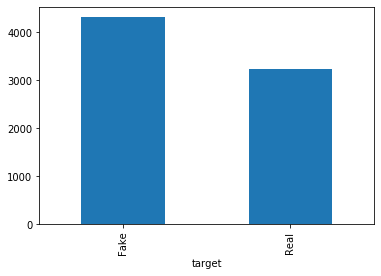

In [24]:
# how many fake and real tweets
print(train.groupby(['target'])['text'].count())
#plot the number of fake and real tweets
train.groupby(['target'])['text'].count().plot(kind='bar')
plt.show()

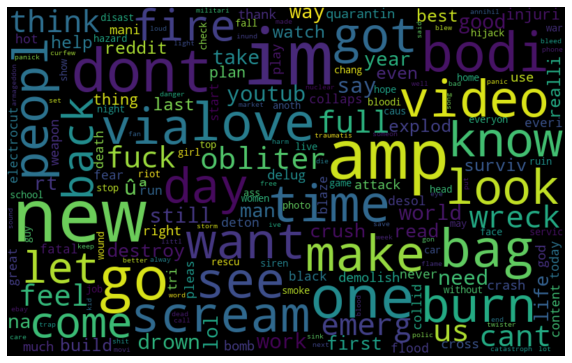

In [25]:
# word cloud for fake tweets
from wordcloud import WordCloud

fake_tweets = train[train['target'] == 'Fake']
all_words = ' '.join([text for text in fake_tweets.text])

word_cloud = WordCloud(width = 800, height=500, max_font_size = 110, collocations =False).generate(all_words)

plt.figure(figsize = (10,7))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()


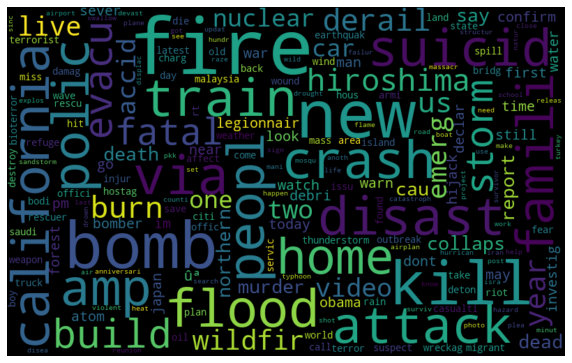

In [26]:
# a wordcloud for real tweets
real_tweets = train[train['target'] == "Real"]
all_Rwords = ' '.join([text for text in real_tweets.text])

wordcloud = WordCloud(width = 800, height=500, max_font_size = 110, collocations =False).generate(all_Rwords)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [27]:
# most common words
from collections import Counter

In [28]:
# Most frequent word counter
from nltk import tokenize
import nltk

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                "Frequency": list(frequency.values())})
    df_frequency = df_frequency = df_frequency.nlargest(columns='Frequency', n=quantity)
    plt.figure(figsize=(10,8))
    ax = sns.barplot(data = df_frequency, x="Word", y="Frequency",color = 'Blue')
    ax.set(ylabel='Count')
    plt.xticks(rotation='vertical')
    plt.show()
    

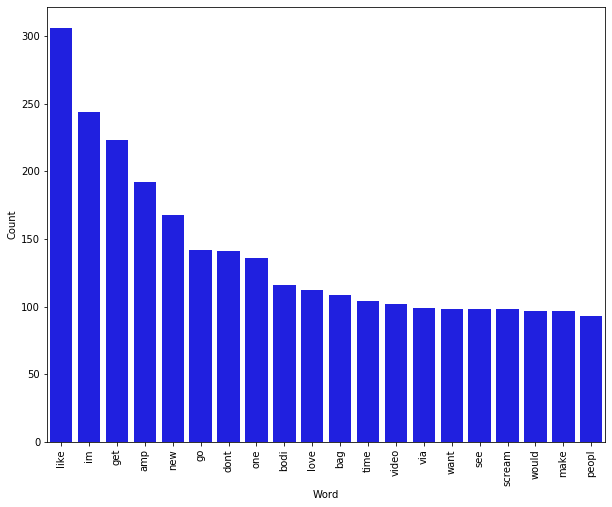

In [29]:
# Most frequent words in fake tweets
counter(train[train['target'] == 'Fake'], 'text', 20)

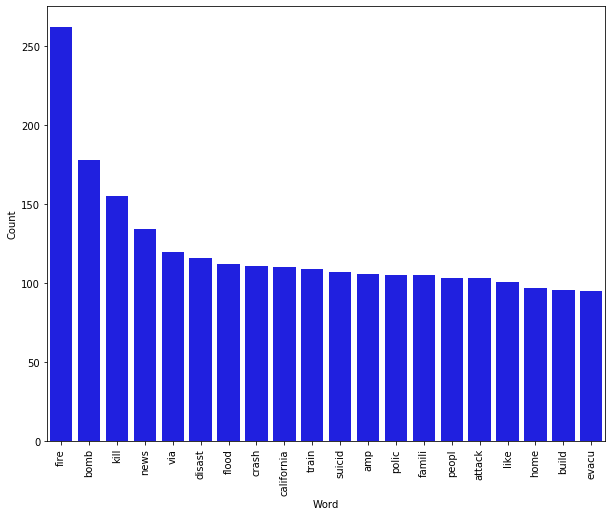

In [30]:
# Most frequent words in real tweets
counter(train[train['target']=='Real'], 'text', 20)

## Modelling

#### preparing the data

In [31]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(train['text'], train.target, test_size=0.2, random_state=42)

### Logistic regression

In [32]:
# Vectorizing and applying TF-IDF
pipe_LR = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

# fitting the model
model = pipe_LR.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print('Accuracy: {}%'.format(round(accuracy_score(y_test, prediction)*100,2)))

Accuracy: 80.21%


In [33]:
# using the dump function to save the pipeline
dump(pipe_LR, filename='model.pkl', compress=1)

['model.pkl']

### Decison tree classifier

In [34]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion = 'entropy',
                                                 splitter = 'best',))])

# fit the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print('Accuracy: {}%'.format(round(accuracy_score(y_test, prediction)*100, 2)))

Accuracy: 70.81%


### Random Forest Classifier

In [35]:
pipe = Pipeline([('vect',CountVectorizer()),
                ( 'tfidf', TfidfTransformer()),
                ('model', RandomForestClassifier(n_estimators=100))])
# n_estimators in random forest classifier refers to the number of trees to be used in the forest

# fit the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print('Accuracy: {}%'.format(round(accuracy_score(y_test, prediction)*100,2)))

Accuracy: 78.49%


### Naive Bayes

##### MultinomialNB

In [36]:
pipe = Pipeline([('Vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('model', MultinomialNB())])
# fit the model
model = pipe.fit(X_train,y_train)

# Accuracy
prediction = model.predict(X_test)
print('Accuracy: {}%'.format(round(accuracy_score(y_test, prediction)*100,2)))

Accuracy: 80.28%
